In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns 
import time 
import datetime 
import statistics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from keras import callbacks
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM

In [52]:
df_rain=pd.read_csv("weatherAUS.csv")
df_rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<AxesSubplot:>

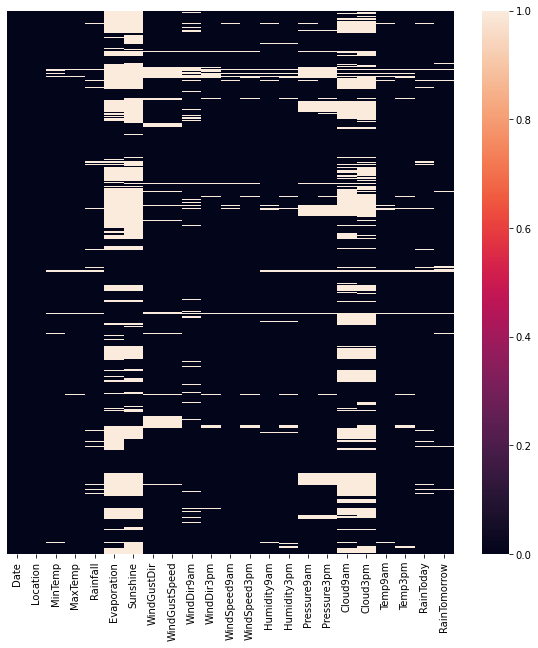

In [53]:
##Here we will draw a heatmap to show the colums with massive values
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(df_rain),yticklabels=False)

In [54]:
#Data information
print(df_rain.describe(exclude=[object]))

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [55]:
categorical_features = [column_name for column_name in df_rain.columns if df_rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [56]:
numerical_features = [column_name for column_name in df_rain.columns if df_rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [57]:
for each_feature in categorical_features:
    unique_values = len(df_rain[each_feature].unique())
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


In [58]:
df_rain['Date'] = pd.to_datetime(df_rain['Date'])
df_rain['year'] = df_rain['Date'].dt.year
df_rain['month'] = df_rain['Date'].dt.month
df_rain['day'] = df_rain['Date'].dt.day
df_rain.drop('Date', axis = 1, inplace = True)
df_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [59]:
# Handling Missing values in Categorical Features:

categorical_features = [column_name for column_name in df_rain.columns if df_rain[column_name].dtype == 'O']
df_rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [60]:
#Replacing the missing data in the categorical features with the following method

categorical_features_with_null = [feature for feature in categorical_features if df_rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df_rain[each_feature].mode()[0]
    df_rain[each_feature].fillna(mode_val,inplace=True)

In [61]:
#Handling the missing values in the numarical features

numerical_features = [column_name for column_name in df_rain.columns if df_rain[column_name].dtype != 'O']
df_rain[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

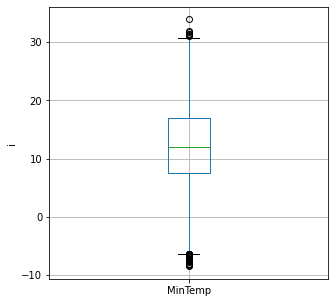

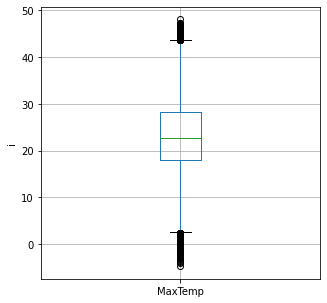

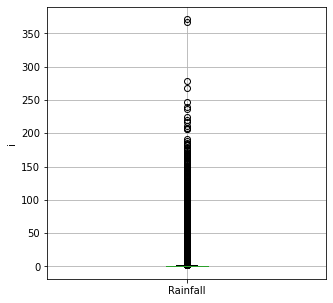

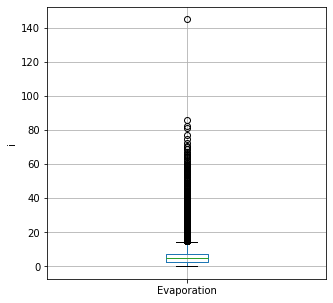

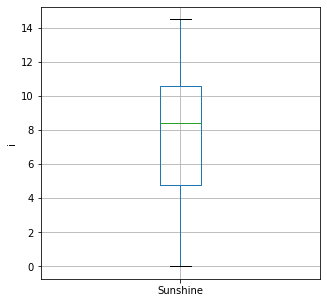

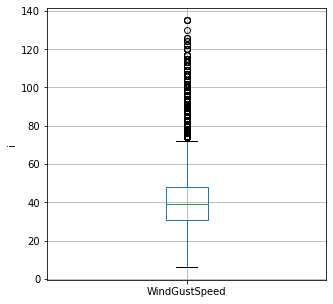

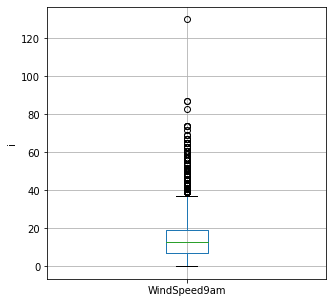

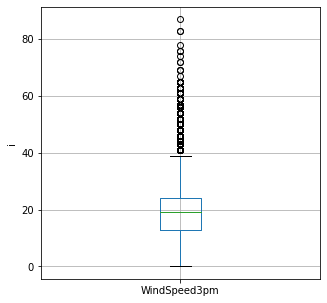

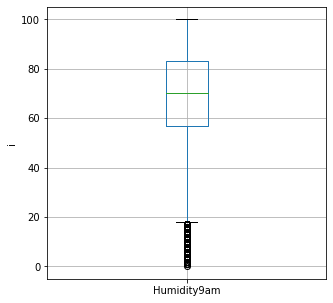

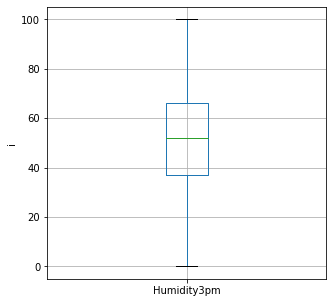

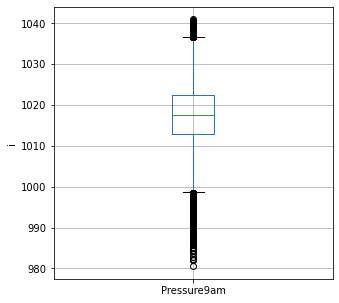

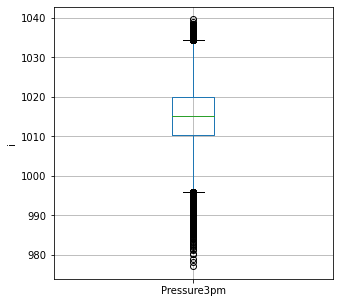

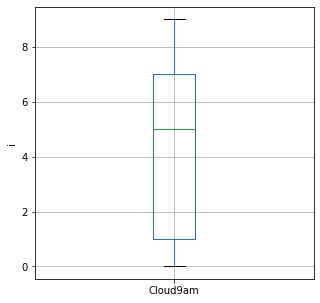

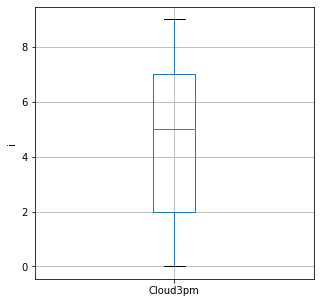

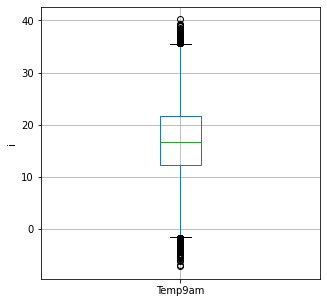

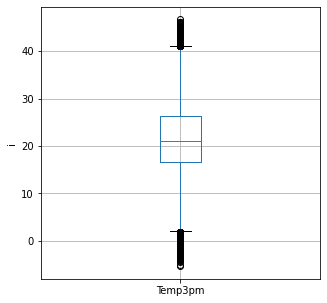

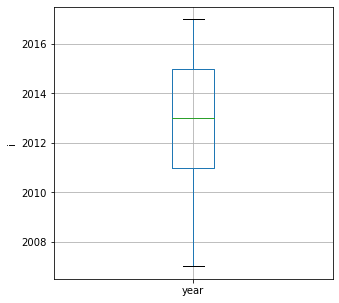

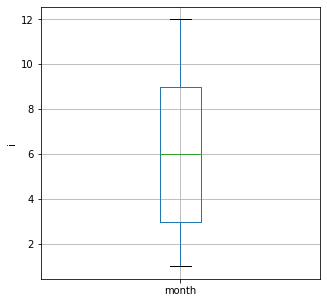

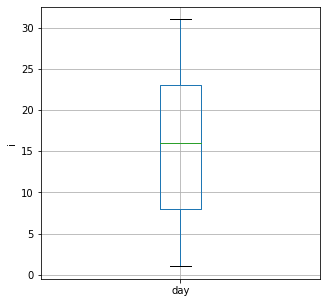

In [62]:
# checking for outliers in numerical data type columns
# first we will analyze outliers using box plot

for i in numerical_features:
    plt.figure(figsize=(5,5))
    fig = df_rain.boxplot(column=i)
    fig.set_ylabel('i')

In [63]:
#Outliner 
#An Outlier is an observation that lies an abnormal distance from other values in a given sample. 
#They can be detected using visualization, Z-score, statistical and probabilistic algorithms.

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df_rain[feature].quantile(0.25)
    q3 = df_rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df_rain.loc[df_rain[feature]<lower_limit,feature] = lower_limit
    df_rain.loc[df_rain[feature]>upper_limit,feature] = upper_limit

In [64]:
numerical_features_with_null = [feature for feature in numerical_features if df_rain[feature].isnull().sum()]

#Here we will replace the null values with the mean value, ofcourse after fixing the outliner problem 

for feature in numerical_features_with_null:
    mean_value = df_rain[feature].mean()
    df_rain[feature].fillna(mean_value,inplace=True)

In [65]:
#Using mean
df_rain

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.900000,0.6,5.318667,7.611178,W,44.000000,W,WNW,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,5.318667,7.611178,WNW,44.000000,NNW,WSW,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,5.318667,7.611178,WSW,46.000000,W,WSW,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,5.318667,7.611178,NE,24.000000,SE,E,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,5.318667,7.611178,W,41.000000,ENE,NW,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,5.318667,7.611178,E,31.000000,SE,ENE,...,1020.3,4.447461,4.50993,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.300000,0.0,5.318667,7.611178,NNW,22.000000,SE,N,...,1019.1,4.447461,4.50993,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.900000,0.0,5.318667,7.611178,N,37.000000,SE,WNW,...,1016.8,4.447461,4.50993,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.000000,0.0,5.318667,7.611178,SE,28.000000,SSE,N,...,1016.5,3.000000,2.00000,15.1,26.0,No,No,2017,6,24


In [68]:
#Using label encoding for the catogarical feature 
label_encoder = LabelEncoder()
for i in categorical_features:
    df_rain[i] = label_encoder.fit_transform(df_rain[i])
    
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [69]:
# Preparing attributes of scale data

# Here we will drope some features, where RainTomorrow represents the target feature 
features = df_rain.drop(['RainTomorrow', 'year','day', 'month'], axis=1)

# RainTomorrow represent the target for our model

target = df_rain['RainTomorrow']

# Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,-5.633017e-14,1.000003,-1.672228,-8.991390e-01,1.451130e-02,8.578808e-01,1.701250
MinTemp,145460.0,1.566965e-15,1.000003,-2.913472,-7.060803e-01,-1.479751e-02,7.236182e-01,2.931010
MaxTemp,145460.0,-3.385251e-16,1.000003,-2.938540,-7.390320e-01,-7.422890e-02,7.037322e-01,2.889096
Rainfall,145460.0,3.403503e-15,1.000003,-0.621563,-6.215632e-01,-6.215632e-01,1.438706e-01,1.929883
Evaporation,145460.0,1.085424e-14,1.000003,-2.064055,-5.117449e-01,-5.342571e-14,-5.342571e-14,3.601876
Sunshine,145460.0,1.079664e-15,1.000003,-2.788512,-1.952415e-15,-1.952415e-15,3.989126e-01,2.523862
WindGustDir,145460.0,1.864381e-14,1.000003,-1.724209,-8.720745e-01,1.930938e-01,1.045228e+00,1.471296
WindGustSpeed,145460.0,-2.529042e-15,1.000003,-2.703677,-7.061493e-01,-6.694052e-02,4.923672e-01,2.689647
WindDir9am,145460.0,-7.433272e-15,1.000003,-1.550000,-8.856691e-01,1.050433e-04,8.858792e-01,1.771653
WindDir3pm,145460.0,1.791486e-15,1.000003,-1.718521,-8.370983e-01,4.432411e-02,9.257465e-01,1.586813


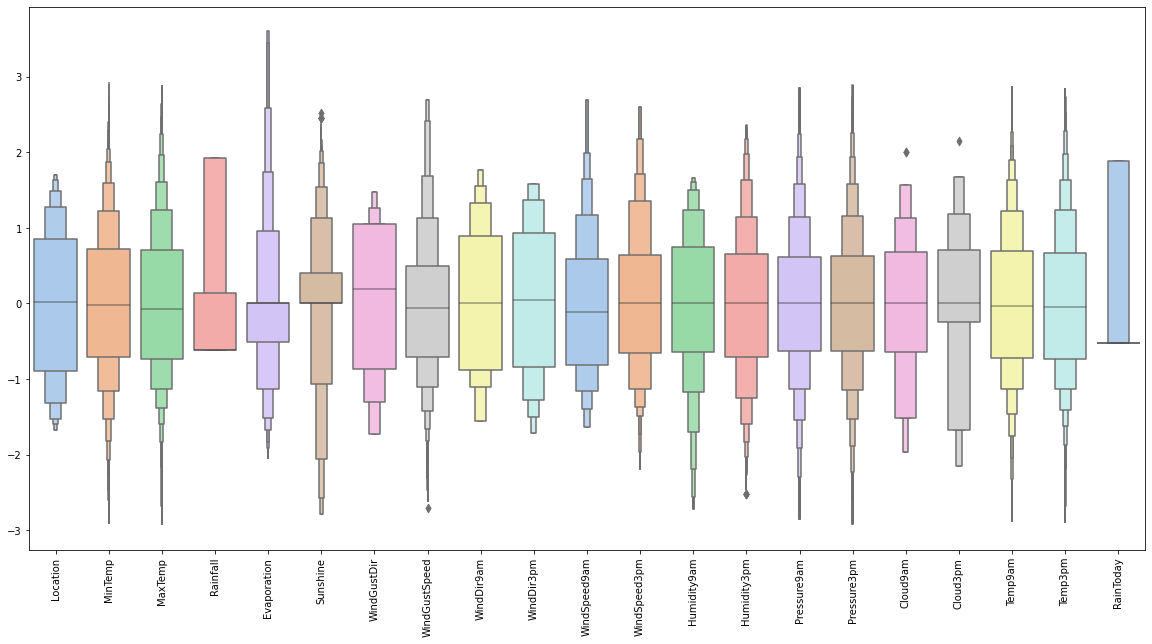

In [70]:
#The following will represent the detection of the outliers for the scaled features 
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = 'pastel')
plt.xticks(rotation=90)
plt.show()

In [71]:
#Then we can fix the problem of the outliers as follows 
features['RainTomorrow'] = target

# Dropping outliers

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

features.shape

(126949, 22)

In [72]:
#Also, we can fix the outliers as follow 
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df_rain[feature].quantile(0.25)
    q3 = df_rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df_rain.loc[df_rain[feature]<lower_limit,feature] = lower_limit
    df_rain.loc[df_rain[feature]>upper_limit,feature] = upper_limit

<function matplotlib.pyplot.show(close=None, block=None)>

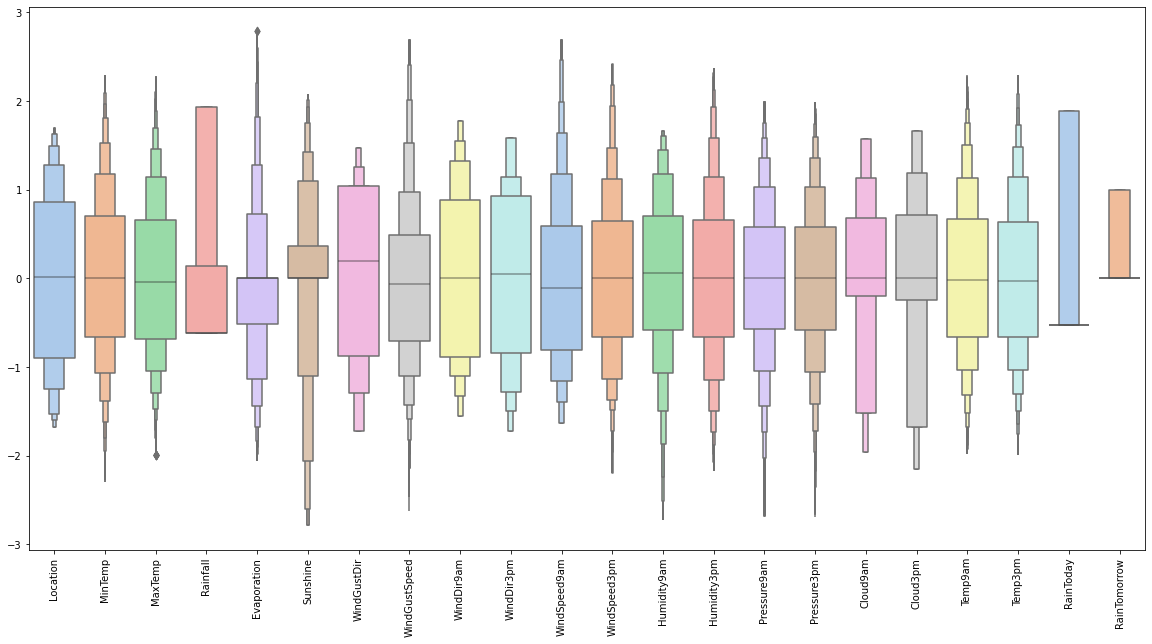

In [73]:
#Then the scaled feature without the outliers can be seen in the following figure 

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = 'pastel')
plt.xticks(rotation=90)
plt.show

In [124]:
#Then here we will define X as the features without the target RainTomorrow 
X = features.drop(['RainTomorrow'], axis=1)
y = features["RainTomorrow"]


# After we define X and Y we will split into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [91]:
#Defination of the functions 
#The rectified linear activation function or ReLU for short 

#is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

#Sigmoid / Logistic Activation Function 

#This function takes any real value as input and outputs values in the range of 0 to 1

#Tanh Function (Hyperbolic Tangent)

#Tanh function is very similar to the sigmoid/logistic activation function, 
#and even has the same S-shape with the difference in output range of -1 to 1.

In [138]:
# Early stopping



#This callback allows you to specify the performance measure to monitor, 
#the trigger, and once triggered, it will stop the training process.
#The EarlyStopping callback is configured when instantiated via arguments.

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, #minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# Layers

model.add(Dense(units = 1024, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
model.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.05))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.05))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN

#Here will use Adam. Adam is an optimization algorithm which it is extension to stochastic 
#gradient descent that has recently seen broader adoption for deep learning applications in computer vision 
#and natural language processing.

opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])



# Train the ANN

history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/150
2539/2539 [==============================] - 13s 5ms/step - loss: 0.3776 - accuracy: 0.8369 - val_loss: 0.3627 - val_accuracy: 0.8409
Epoch 2/150
2539/2539 [==============================] - 15s 6ms/step - loss: 0.3556 - accuracy: 0.8462 - val_loss: 0.3566 - val_accuracy: 0.8459
Epoch 3/150
2539/2539 [==============================] - 14s 6ms/step - loss: 0.3511 - accuracy: 0.8480 - val_loss: 0.3511 - val_accuracy: 0.8455
Epoch 4/150
2539/2539 [==============================] - 15s 6ms/step - loss: 0.3474 - accuracy: 0.8496 - val_loss: 0.3485 - val_accuracy: 0.8476
Epoch 5/150
2539/2539 [==============================] - 14s 6ms/step - loss: 0.3449 - accuracy: 0.8505 - val_loss: 0.3470 - val_accuracy: 0.8491
Epoch 6/150
2539/2539 [==============================] - 18s 7ms/step - loss: 0.3416 - accuracy: 0.8526 - val_loss: 0.3464 - val_accuracy: 0.8490
Epoch 7/150
2539/2539 [==============================] - 19s 7ms/step - loss: 0.3387 - accuracy: 0.8543 - val_loss: 0.3468 -

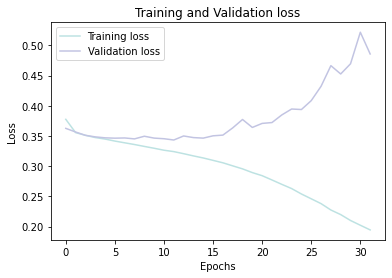

In [139]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

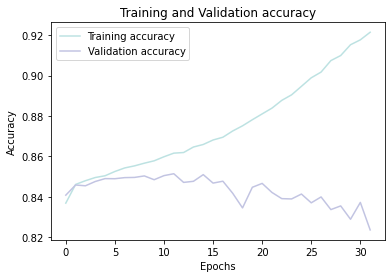

In [140]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot:>

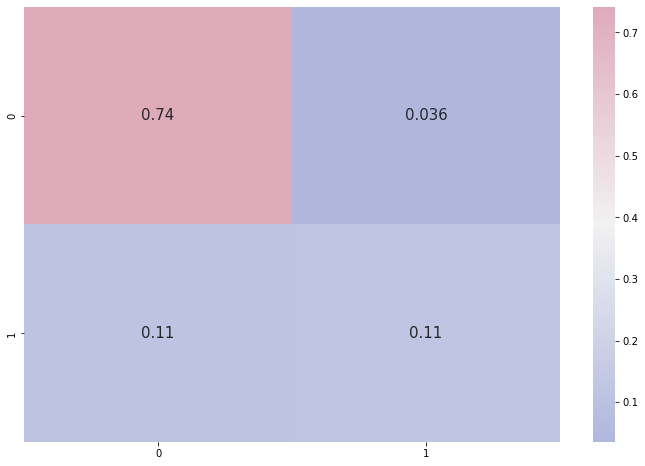

In [141]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})



In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     19732
           1       0.76      0.51      0.61      5658

    accuracy                           0.85     25390
   macro avg       0.82      0.73      0.76     25390
weighted avg       0.85      0.85      0.84     25390

